<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe1-InsertionSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

**Entrada**: Arreglo de tamaño n con valores numéricos $[a_1,a_2,...,a_n]$

**Salida**: Arreglo de la forma: $[a_1',a_2',...,a_n']$, de modo que $a_1'\leq a_2' \leq... \leq a_n'$.

Ordenar una secuencia de números es un problema bastante usual y conocido en el mundo de la informática. A pesar de que se conocen decenas de algoritmos de ordenamiento, este problema sigue siendo de gran interés para los informáticos, especialmente a la hora de decidir cuál de ellos resulta más eficiente al ordenar un determinado conjunto de datos.

Por ejemplo, InsertionSort es uno de los algoritmos más sencillos e intuitivos, puesto que se asemeja a ordenar un mazo de cartas. Sin embargo, otros algoritmos como QuickSort o MergeSort podrían resultar más eficientes cuando se tiene un gran conjunto de datos. 


# 2. Insertion Sort

## 2.1 Código

El siguiente código muestra una implementación del algoritmo **InsertionSort**.

In [44]:
from termcolor import colored

def insertion_sort(A, verbose=False):
    n = len(A)
    t = 0 # Contador de comparaciones

    if verbose == True: print("Arreglo inicial: ", A)

    for i in range(1, n):
        if verbose == True: print("\nPasada ",i)

        j = i # Variable auxiliar usada para recorrer el arreglo hacia atrás

        if verbose == True and A[j] >= A[j - 1]:
            print("No hay intercambios")

        t += 1 # Se realiza la primera comparación
        # Si el elemento es menor al anterior se intercambian
        while A[j] < A[j - 1]:

            if verbose == True:
                if j - 1 > 0:
                    print(str(A[:j-1])[1:-1] + ', ', end='')

                print(colored(f"{str(A[j-1:j+1])[1:-1]}", "red"), end='')

                if j + 1 < n:
                    print(', ', end='')   
                print(str(A[j+1:])[1:-1])

            A[j], A[j - 1] = A[j - 1], A[j]
            j -= 1

            if j == 0: break

            t += 1 # Luego del intercambio debe realizarse una nueva comparación

        if verbose == True: 
          print("\nAl finalizar pasada:")
          print(str(A)[1:-1])

    if verbose == True: print("\nArreglo ordenado: ", A)

    return A, t

# Ejemplo
A = [7,5,1,8,2]
print("Entrada: ", A)
A, cont = insertion_sort(A)
print("Salida: ", A)
print("Comparaciones: ", cont)

Entrada:  [7, 5, 1, 8, 2]
Salida:  [1, 2, 5, 7, 8]
Comparaciones:  8


## 2.2. Descripción del algoritmo

El algoritmo recibe como entrada un arreglo con la secuencia de números que queremos ordenar. Luego, el algoritmo ordena los números de menor a mayor y finalmente retorna el arreglo resultante. Los pasos realizados por el algoritmo son los siguientes:

1. Se comienza iterando en el arreglo desde la posición `i = 1`. Luego de cada iteración, la variable $i$ se incrementa en 1 hasta llegar a la última posición del arreglo.

2. En cada iteración, se asigna el valor de $i$ a una variable auxiliar $j$.

3. En cada iteración, mientras `A[j] < A[j-1]` y `j > 0`, entonces los elementos se intercambian de posición y la variable $j$ disminuye en 1.

4. Al finalizar, se retorna el arreglo ordenado y un contador de comparaciones $t$.

## 2.3. Ejemplo

Consideremos, por ejemplo, el arreglo:

$a=[4,2,5,1]$

En la primera iteración (comenzando desde `i = 1`), se intercambia el 2 por el 4:

$a=[2,4,5,1]$

En la segunda iteración, notamos que `5 > 4`, por lo cual no se realizan intercambios.

En la tercera iteración, se intercambia el 1 por el 5:

$a=[2,4,1,5]$

Luego, se intercambia el 1 por el 4:

$a=[2,1,4,5]$

Por último, se intercambia el 1 por el 2:

$a=[1,2,4,5]$

Y ya tenemos el arreglo ordenado.


## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [45]:
import random
A = random.sample(range(1, 100), 6)
A, cont = insertion_sort(A,verbose=True)

Arreglo inicial:  [97, 78, 90, 55, 85, 81]

Pasada  1
97, 78, 90, 55, 85, 81

Al finalizar pasada:
78, 97, 90, 55, 85, 81

Pasada  2
78, 97, 90, 55, 85, 81

Al finalizar pasada:
78, 90, 97, 55, 85, 81

Pasada  3
78, 90, 97, 55, 85, 81
78, 90, 55, 97, 85, 81
78, 55, 90, 97, 85, 81

Al finalizar pasada:
55, 78, 90, 97, 85, 81

Pasada  4
55, 78, 90, 97, 85, 81
55, 78, 90, 85, 97, 81

Al finalizar pasada:
55, 78, 85, 90, 97, 81

Pasada  5
55, 78, 85, 90, 97, 81
55, 78, 85, 90, 81, 97
55, 78, 85, 81, 90, 97

Al finalizar pasada:
55, 78, 81, 85, 90, 97

Arreglo ordenado:  [55, 78, 81, 85, 90, 97]


En cada iteración se intercambian los elementos en rojo.

# 3. Correctitud

### **Teorema (Correctitud).**

*El algoritmo **InsertionSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.


## Prueba del Teorema

Luego de cada iteración, en caso de que el elemento $i$ del arreglo sea desplazado a una posición $j$, podemos observar que se cumple la propiedad $a_{j-1} \leq a_{j} \leq a_{j+1}$. En caso de que no hayan ocurrido intercambios, observamos que $a_{i-1} \leq a_{i}$. A partir de esto, podemos formular la siguiente **propiedad invariante de bucle**:

> Al comienzo de cada iteración $i$ del bucle más grande, los primeros $i$ elementos del arreglo forman un subarreglo ordenado de menor a mayor.

**Inicialización**

Al comienzo de la primera iteración (i=1), los primeros $i$ elementos del arreglo cumplen la propiedad. Esto es trivialmente cierto.

**Mantención**

Aplicando inducción, asumimos que al comienzo de cada iteración se cumple la propiedad. Es decir, los primeros $i$ elementos del arreglo forman un subconjunto ya ordenado.

Consideremos $x$ como el menor elemento de la primera parte del arreglo ubicado en la posición $i$. Durante la ejecución del algoritmo, este elemento se desplazará a la primera posición del arreglo. Podemos notar que los elementos anteriores a $x$, luego de ser intercambiados, son desplazados una posición a la derecha, de modo que el orden entre estos elementos se mantiene.

Al finalizar la iteración (y al comienzo de la siguiente), se seguirá cumpliendo la **propiedad invariante**.

**Correctitud**

Finalmente, como la propiedad de bucle invariante es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al **finalizar la n-ésima iteración del algoritmo**, se genera un arreglo $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor. $\Box$



# 4. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El algoritmo **InsertionSort** tiene un **tiempo de ejecución de** $O(n^2)$ en el peor caso.*

## Prueba del teorema

En base a la demostración anterior, podemos intuir que el peor caso para este algoritmo ocurrirá cuando los elementos estén dispuestos en orden inverso, es decir, de mayor a menor. Esto implica que en cada iteración $i$ se realizarán $i$ comparaciones e intercambios. Dicho de otra forma, el elemento en la posición $i$ deberá intercambiarse con todos los elementos anteriores hasta desplazarse a la posición correcta.

## Ejemplo

In [46]:
A = [5,4,3,2,1]
print("Entrada: ", A)
A, cont = insertion_sort(A, True)
print("Salida: ", A)
print("Comparaciones: ", cont)

Entrada:  [5, 4, 3, 2, 1]
Arreglo inicial:  [5, 4, 3, 2, 1]

Pasada  1
5, 4, 3, 2, 1

Al finalizar pasada:
4, 5, 3, 2, 1

Pasada  2
4, 5, 3, 2, 1
4, 3, 5, 2, 1

Al finalizar pasada:
3, 4, 5, 2, 1

Pasada  3
3, 4, 5, 2, 1
3, 4, 2, 5, 1
3, 2, 4, 5, 1

Al finalizar pasada:
2, 3, 4, 5, 1

Pasada  4
2, 3, 4, 5, 1
2, 3, 4, 1, 5
2, 3, 1, 4, 5
2, 1, 3, 4, 5

Al finalizar pasada:
1, 2, 3, 4, 5

Arreglo ordenado:  [1, 2, 3, 4, 5]
Salida:  [1, 2, 3, 4, 5]
Comparaciones:  10


En este caso, podemos observar que el número de la iteración coincide con la cantidad de comparaciones realizadas en ella.

Considerando que el algoritmo realiza $n-1$ iteraciones en total, podemos concluir que se deberían realizar $\sum\limits_{i=0}^{n-1} i=\frac{n(n-1)}{2}$ comparaciones, por lo que el tiempo de ejecución del algoritmo en el peor caso es $O(n^2)$. $\Box$

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* Cantidad de comparaciones del peor caso calculadas matemáticamente,
* Cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* Cantidad de comparaciones realizadas experimentalmente para entradas aleatorias para tamaños de problema con $n \in [5,19]$.

Los arreglos de entrada son generados aleatoriamente con valores numéricos en el rango de 1 a 100.

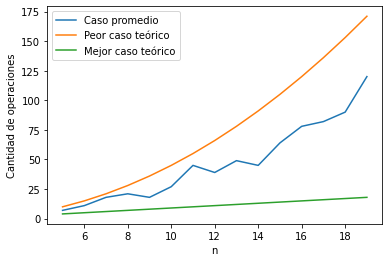

In [48]:
import matplotlib.pyplot as plt

x = [n for n in range(5,20)] 
y1 = [n*(n-1)/2 for n in range(5,20)] # Peor caso
y2 = [n-1 for n in range(5,20)] # Mejor caso
y = []; 

for n in range(5,20):
    A = random.sample(range(1, 101), n)
    A, cont = insertion_sort(A)
    y.append(cont)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Caso promedio", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('Cantidad de operaciones')
plt.show()

### Análisis de resultados

Como se puede observar en el gráfico, la curva de comparaciones que deben realizarse para ordenar un arreglo aleatorio toma valores intermedios, que no se acercan a los casos extremos.

## 5.2 Análisis del algoritmo para arreglos casi completamente ordenados

A continuación se calculará experimentalmente la cantidad de comparaciones necesarias cuando se utiliza un arreglo casi completamente ordenado, en comparación al número de comparaciones en el mejor y peor caso.

Se considerará un arreglo casi completamente ordenado como aquel cuyos últimos 3 elementos están dispuestos en orden inverso, mientras que el resto de elementos ya se encuentran correctamente ordenados.

Los arreglos de entrada son generados para tamaños de problema con $n \in [5,19]$, y sus valores seguirán una secuencia ordenada de 1 hasta $n$, a excepción de los últimos 3 elementos que estarán dispuestos de mayor a menor. Por ejemplo, para $n = 7$, se generará el arreglo $[1, 2, 3, 4, 7, 6, 5]$

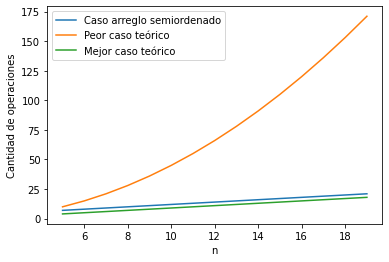

In [49]:
import matplotlib.pyplot as plt

x = [n for n in range(5,20)] 
y1 = [n*(n-1)/2 for n in range(5,20)] # Peor caso
y2 = [n-1 for n in range(5,20)] # Mejor caso
y = []; 

for n in range(5, 20):
    A1 = [x for x in range(1,n-2)]
    A2 = [x for x in range(n,n-3,-1)]
    A = A1 + A2
    A, cont = insertion_sort(A)
    y.append(cont)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Caso arreglo semiordenado", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('Cantidad de operaciones')
plt.show()


### Análisis de resultados

Se puede observar que la curva para el caso de arreglos semiordenados se acerca a la curva del mejor caso. Esto permite inferir que el orden previo que exista en los valores de entrada es un factor relevante a la hora de determinar el número de comparaciones y el tiempo de ejecución del algoritmo.

## 5.3 Tiempo de ejecución y comparación con BubbleSort

En primer lugar, definiremos una nueva función para ordenar los datos mediante el algoritmo BubbleSort.

In [50]:
def bubble_sort(A):
    n = len(A)
    t = 0 # Contador de comparaciones

    for i in range(1, n+1):
        # Flag que indica si el arreglo ya se encuentra ordenado
        already_sorted = True

        # Se recorre el arreglo
        for j in range(n - i):
            t +=1
            if A[j] > A[j + 1]:
                # Si el elemento es mayor al siguiente se intercambia
                A[j], A[j + 1] = A[j + 1], A[j]
                already_sorted = False

        if already_sorted:
            break

    return A, t

A continuación, se muestra la comparación del tiempo de ejecución de ambos algoritmos al utilizar como entrada arreglos generados de forma aleatoria, con $n \in [5,500]$ y valores en el rango de 1 a 1000.

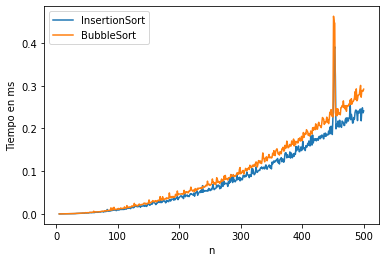

In [54]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y1=[]; y2=[];

for n in range(5,501):

    A = random.sample(range(1, 1001), n)

    # La función repeat ejecuta 20 veces el algoritmo con el arreglo A y retorna el mejor tiempo obtenido.
    t_insert = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({A})", repeat=1, number=10)
    t_bubble = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({A})", repeat=1, number=10)

    x.append(n)
    y1.append(t_insert)
    y2.append(t_bubble)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["InsertionSort", "BubbleSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como se puede apreciar, ambos algoritmos aumentan su tiempo de ejecución de forma cuadrática en función del tamaño del problema. Sin embargo, InsertionSort presenta un mejor desempeño para valores grandes de $n$. Esto se debe a que el algoritmo BubbleSort realiza una mayor cantidad de comparaciones en el caso promedio, cuyos valores son cercanos a los del peor caso. En cambio, InsertionSort resulta un algoritmo más eficiente en el caso promedio, puesto que la cantidad de comparaciones que realiza es significativamente menor a la del peor caso.

Además, se observan algunos peaks de tiempo en el gráfico. Estos podrían deberse al comportamiento impredecible del procesador u otros procesos en ejecución.

